In [11]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [63]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [67]:
# Import des libs
import pandas as pd

# Chargement
df = pd.read_csv("DataSet_Emails.csv", encoding="utf-8")

# Suppression colonne inutile (Unnamed)
df.drop(columns=[col for col in df.columns if col.lower().startswith("unnamed")], inplace=True)

# Aperçu des colonnes
print("Colonnes :", df.columns.tolist())

# Dimensions
print("Dimensions :", df.shape)

# Types des données
print("\nTypes des colonnes :")
print(df.dtypes)

# Quelques lignes
df.head()

Colonnes : ['message_id', 'text', 'label', 'label_text', 'subject', 'message', 'date']
Dimensions : (31716, 7)

Types des colonnes :
message_id     int64
text          object
label          int64
label_text    object
subject       object
message       object
date          object
dtype: object


,message_id,text,label,label_text,subject,message,date
0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19
2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11
3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13


Valeurs manquantes :
message_id      0
text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64

Nombre de lignes dupliquées : 0

Distribution des emails :
label_text
spam    16163
ham     15553
Name: count, dtype: int64


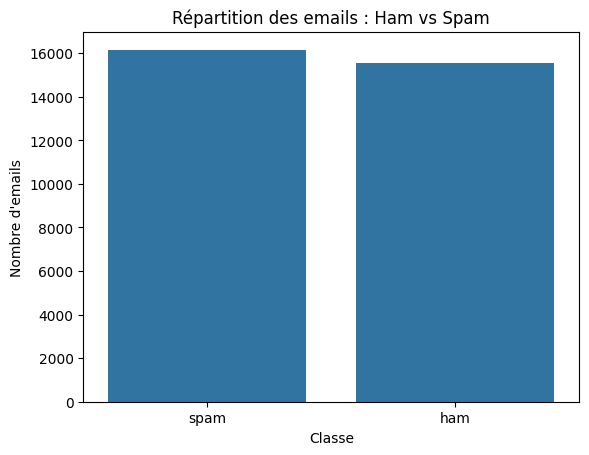

In [68]:
# 🔍 Valeurs manquantes
print("Valeurs manquantes :")
print(df.isnull().sum())

# 🔁 Doublons
print("\nNombre de lignes dupliquées :", df.duplicated().sum())

# 📊 Répartition des classes
print("\nDistribution des emails :")
print(df['label_text'].value_counts())

# 📈 Visualisation graphique
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label_text')
plt.title("Répartition des emails : Ham vs Spam")
plt.xlabel("Classe")
plt.ylabel("Nombre d'emails")
plt.show()

In [69]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Télécharger les stopwords
nltk.download('stopwords')

# Initialiser stopwords et stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Fonction de nettoyage sans word_tokenize
def preprocess_text(text):
    # 1. Mise en minuscules
    text = str(text).lower()
    # 2. Suppression ponctuation
    text = re.sub(r'[^\w\s]', '', text)
    # 3. Séparer en mots par split (au lieu de word_tokenize)
    tokens = text.split()
    # 4. Enlever stopwords
    tokens = [word for word in tokens if word.isalpha()]  # ❗ Garde uniquement les mots alphabetiques
    tokens = [word for word in tokens if word not in stop_words]
    # 5. Appliquer le stemming
    tokens = [stemmer.stem(word) for word in tokens]
    # 6. Reconstruire le texte nettoyé
    return " ".join(tokens)

# Appliquer à toute la colonne
df['clean_text'] = df['text'].apply(preprocess_text)

# Affichage de vérification
df[['text', 'clean_text']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,clean_text
0,any software just for 15 $ - 99 $ understandin...,softwar understand oem softwar lead temptat fi...
1,perspective on ferc regulatory action client c...,perspect ferc regulatori action client conf ca...
2,wanted to try ci 4 lis but thought it was way ...,want tri ci li thought way expens viagra per d...
3,"enron / hpl actuals for december 11 , 2000 tec...",enron hpl actual decemb teco tap enron hpl ga ...
4,looking for cheap high - quality software ? ro...,look cheap high qualiti softwar rotat napoleon...


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# 1. Initialisation du vectoriseur
tfidf = TfidfVectorizer(max_features=5000)

# 2. Apprentissage + transformation du texte
X = tfidf.fit_transform(df['clean_text'])

# 3. Récupération des étiquettes
y = df['label']

# 4. Affichage des dimensions
print("Dimensions de X :", X.shape)  # (nb_emails, nb_mots)

# 5. Récupérer les noms des colonnes (mots choisis)
feature_names = tfidf.get_feature_names_out()

tfidf_df = pd.DataFrame(X.toarray(), columns=feature_names)
tfidf_df.head()

# tfidf_df['aa'].unique()

Dimensions de X : (31716, 5000)


,aa,ab,abacha,abandon,abb,abel,abidjan,abiiiti,abil,abl,...,zhiyong,zimbabw,zimin,zip,zipper,zone,zonedubai,zu,zufferli,zyban
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Diviser les données en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Créer le modèle
nb_model = MultinomialNB()

# 3. Entraîner le modèle sur les données d'entraînement
nb_model.fit(X_train, y_train)

# 4.1 Prédiction sur les données d'entraînement
y_pred_train = nb_model.predict(X_train)

# 4.2 Prédiction sur les données de test (déjà faite)
y_pred_test = nb_model.predict(X_test)

# 5.1 Évaluation sur les données d'entraînement
print("🎓 Train Accuracy :", accuracy_score(y_train, y_pred_train))

# 5.2 Évaluation sur les données de test
print("🧪 Test Accuracy  :", accuracy_score(y_test, y_pred_test))

# 6. Rapport de classification sur test
print("\n📊 Rapport de classification (test) :")
print(classification_report(y_test,y_pred_test))

🎓 Train Accuracy : 0.9823821535551001
🧪 Test Accuracy  : 0.98218789407314

📊 Rapport de classification (test) :
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3084
           1       0.98      0.99      0.98      3260

    accuracy                           0.98      6344
   macro avg       0.98      0.98      0.98      6344
weighted avg       0.98      0.98      0.98      6344



In [ ]:
from sklearn.model_selection import StratifiedKFold

# Définir Stratified K-Fold avec 5 partitions
stratified_kfold = StratifiedKFold(n_splits=5)

# Effectuer la validation croisée stratifiée
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold)

# Afficher les scores pour chaque fold
print(f"Scores pour chaque fold : {cv_scores}")
print(f"Précision moyenne : {np.mean(cv_scores)}")

NameError: name 'y_pred' is not defined

C:\Users\a\AppData\Local\Temp\ipykernel_13160\2136198060.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ham_text = " ".join(df[df_label_text['label'] == 0] ['text'].astype(str))


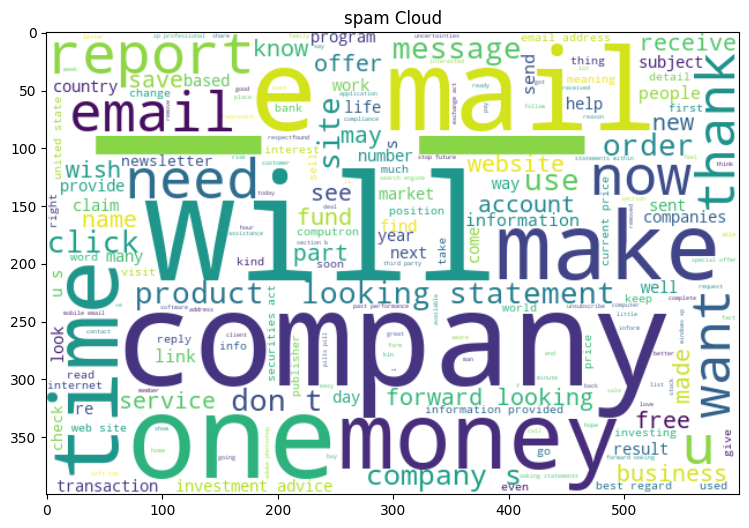

In [33]:
from wordcloud import WordCloud

spam_text = " ".join(df_label_text[df_label_text['label'] == 1] ['text'].astype(str))
ham_text = " ".join(df[df_label_text['label'] == 0] ['text'].astype(str))

wordcloud_spam = WordCloud(width=600, height=400, background_color ='white').generate(spam_text)
wordcloud_ham = WordCloud(width=600, height=400, background_color='white').generate(ham_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('spam Cloud')
plt.show()


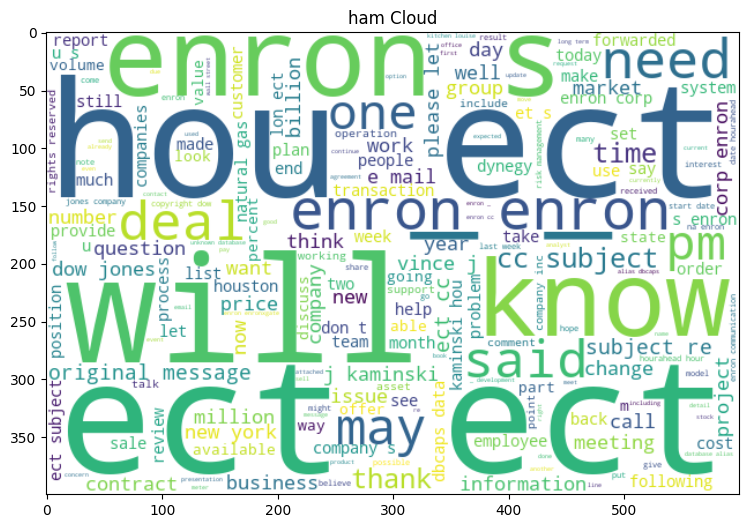

In [20]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('ham Cloud')
plt.show()

In [55]:
df.duplicated()
df.isnull().sum()

Unnamed: 0      0
message_id      0
text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64

In [62]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Télécharger les ressources nécessaires si vous ne les avez pas déjà
nltk.download('punkt_tab')
nltk.download('stopwords')

# Fonction de prétraitement
def preprocess_text(text):
    # 1. Convertir en minuscules
    text = text.lower()
    
    # 2. Supprimer les doublons (en utilisant un ensemble pour éliminer les doublons)
    words = word_tokenize(text)
    words = list(set(words))
    
    # 3. Supprimer les valeurs manquantes (ici on vérifie juste si le texte n'est pas vide)
    if not text.strip():
        return []
    
    # 4. Tokenisation
    words = word_tokenize(text)

    # 5. Supprimer les stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # 6. Supprimer la ponctuation et les caractères spéciaux
    words = [re.sub(f"[{string.punctuation}]", "", word) for word in words]
    
    # 7. Appliquer le stemming
    porter_stemmer = PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    
    return words

# Appliquer le prétraitement sur la colonne 'text' du DataFrame existant 'df'
df_label_text['processed_text'] = df_label_text['text'].apply(preprocess_text)


df_label_text[["text", "preprocess_text"]].head()

# # Joindre les mots traités en une chaîne de texte
# df_label_text['processed_text_joined'] = df_label_text['processed_text'].apply(lambda x: ' '.join(x))

# # Afficher le DataFrame avec les nouvelles colonnes
# print(df_label_text[['text', 'processed_text_joined']])


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: 'float' object has no attribute 'lower'

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# import pandas as pd

# # 1. Initialisation du vectoriseur
# tfidf = TfidfVectorizer(max_features=5000)

# # 2. Apprentissage + transformation du texte
# X = tfidf.fit_transform(df['processed_text'])

# # 3. Récupération des étiquettes
# y = df['label']

# # 4. Affichage des dimensions
# print("Dimensions de X :", X.shape)  # (nb_emails, nb_mots)

# # 5. Récupérer les noms des colonnes (mots choisis)
# feature_names = tfidf.get_feature_names_out()

# tfidf_df = pd.DataFrame(X.toarray(), columns=feature_names)
# tfidf_df.head()

# # tfidf_df['aa'].unique()

KeyError: 'processed_text'

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='char')

X = vectorizer.fit_transform(df_label_text)

print("Matrice de comptage des caractéres: ")
print(X.toarray())

print("extrait (features): ")
print(vectorizer.get_feature_names_out())

df_vectorizer = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(df_vectorizer)

Matrice de comptage des caractéres: 
[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 1]
 [0 1 1 0 0 1 0 0 2 0 0 0 0 0 0 0]
 [1 0 0 1 1 3 0 0 0 0 1 1 1 2 2 1]
 [2 0 0 1 2 4 1 1 0 1 2 1 1 2 2 1]]
extrait (features): 
['_' 'a' 'b' 'c' 'd' 'e' 'i' 'j' 'l' 'n' 'o' 'p' 'r' 's' 't' 'x']
   _  a  b  c  d  e  i  j  l  n  o  p  r  s  t  x
0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  2  1
1  0  1  1  0  0  1  0  0  2  0  0  0  0  0  0  0
2  1  0  0  1  1  3  0  0  0  0  1  1  1  2  2  1
3  2  0  0  1  2  4  1  1  0  1  2  1  1  2  2  1
